In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'1.4.0'

### 하이퍼 파라미터 설정하기

In [4]:
learning_rate = 0.01
num_epochs = 1000
step_display = 50

### 학습에 이용할 데이터 정의

In [5]:
x = [2.7, 4.8, 9.3, 13.4, 24.8, 31.3, 48.5, 53.0, 68.1, 74.2, 88.6, 94.5]
y = [7.0, 28.8, 22.8, 67.1, 48.8, 100.2, 140.0, 190.2, 215.2, 285.6, 260.3, 251.1]

In [8]:
assert len(x) == len(y)
len(x)

12

In [10]:
weight = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name = 'weight')
bias = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name = 'bias')
# tf.random_uniform():무작위 수로 초기화 [1] 변수의 형태를, -1.0 ~ 1.0 사이의 스칼라 값으로 무작위 생성

In [11]:
x_true = tf.placeholder(dtype = tf.float32, name = 'x_true')
y_true = tf.placeholder(dtype = tf.float32, name = 'y_true')
# tf.placeholder(): 그래프를 구축할 때 메모리에 저장하지 않으며, 그래프 실제 실행 시 피드하면서 메모리에 저장

### 그래프 만들기

In [13]:
y_pred = tf.add(tf.multiply(weight, x_true), bias)
# wieght*x_true + bias

In [14]:
cost = tf.reduce_mean(tf.square(y_pred - y_true))
# (y_pred - y_true)^2 / n

In [15]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
# 비용을 최소화 할 Optimizer 정의

### 학습 시작하기

In [16]:
# 모든 전역변수 초기화
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [18]:
for epoch in range(num_epochs):
    _, c = sess.run([optimizer, cost], feed_dict = {x_true: x, y_true: y})
    if (epoch+1) % step_display == 0:
        print("Epoch: {0}, cost: {1}, weight: {2}, bias: {3}".format(
        epoch+1, c, sess.run(weight), sess.run(bias)))
print("최적화 작업을 완료했습니다.")

Epoch: 50, cost: 9798.1416015625, weight: [ 1.29573131], bias: [ 0.51011848]
Epoch: 100, cost: 5888.18896484375, weight: [ 1.72419727], bias: [ 0.94002545]
Epoch: 150, cost: 3431.718017578125, weight: [ 2.08470201], bias: [ 1.30369306]
Epoch: 200, cost: 2004.7626953125, weight: [ 2.37582111], bias: [ 1.60011375]
Epoch: 250, cost: 1245.0501708984375, weight: [ 2.60020494], bias: [ 1.83224404]
Epoch: 300, cost: 876.9251098632812, weight: [ 2.76454306], bias: [ 2.00690866]
Epoch: 350, cost: 715.2675170898438, weight: [ 2.87860632], bias: [ 2.13382125]
Epoch: 400, cost: 651.0455932617188, weight: [ 2.95354247], bias: [ 2.22392702]
Epoch: 450, cost: 627.9575805664062, weight: [ 3.00011969], bias: [ 2.2877264]
Epoch: 500, cost: 620.4229125976562, weight: [ 3.02749515], bias: [ 2.33410788]
Epoch: 550, cost: 618.1641845703125, weight: [ 3.04267859], bias: [ 2.36985564]
Epoch: 600, cost: 617.5136108398438, weight: [ 3.05058098], bias: [ 2.39970803]
Epoch: 650, cost: 617.3014526367188, weight: [

In [20]:
training_cost = sess.run(cost, feed_dict = {x_true: x, y_true: y})
print ("최종 cost: {}".format(c))
print ("최종 weight: {}".format(sess.run(weight)))
print ("최종 cost: {}".format(sess.run(bias)))

최종 cost: 616.6764526367188
최종 weight: [ 3.05498528]
최종 cost: [ 2.62101579]


### 그래프로 직선 비교하기

- ro에서 r은 빨간색을 o는 동그라미를 의미합니다.
- 학습의 결과로 얻은 최적화된 선을 그립니다.
- 범례(legend())를 보여줍니다.
- 시각화한 그래프를 출력합니다.

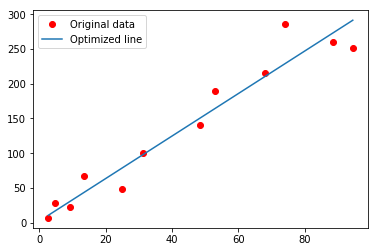

In [21]:
plt.plot(x, y, 'ro', label = 'Original data')
plt.plot(x, sess.run(weight)*x + sess.run(bias), label = 'Optimized line')
plt.legend()
plt.show()

In [22]:
sess.close()